In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("../wine-classification"))


['.ipynb_checkpoints', 'Decision tree.ipynb', 'kneighbour.ipynb', 'random forest.ipynb', 'svc.ipynb', 'winequality-red.csv']


In [6]:
df = pd.read_csv('winequality-red.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


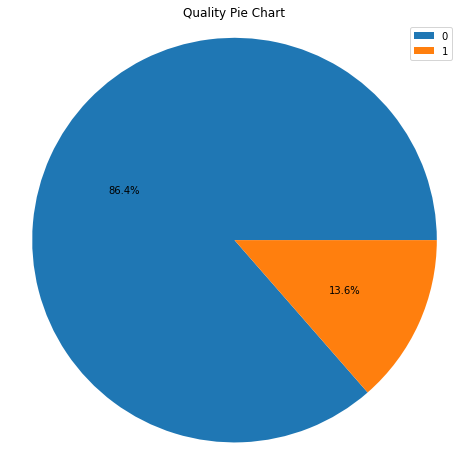

The good quality wines count for  13.6 %.


In [7]:
df['grade'] = 1 # good
df.grade[df.quality < 7] = 0 # not good

plt.figure(figsize = (8,8))
labels = df.grade.value_counts().index
plt.pie(df.grade.value_counts(), autopct='%1.1f%%')
plt.legend(labels, loc="best")
plt.axis('equal')
plt.title('Quality Pie Chart')
plt.show()
print('The good quality wines count for ',round(df.grade.value_counts(normalize=True)[1]*100,1),'%.')

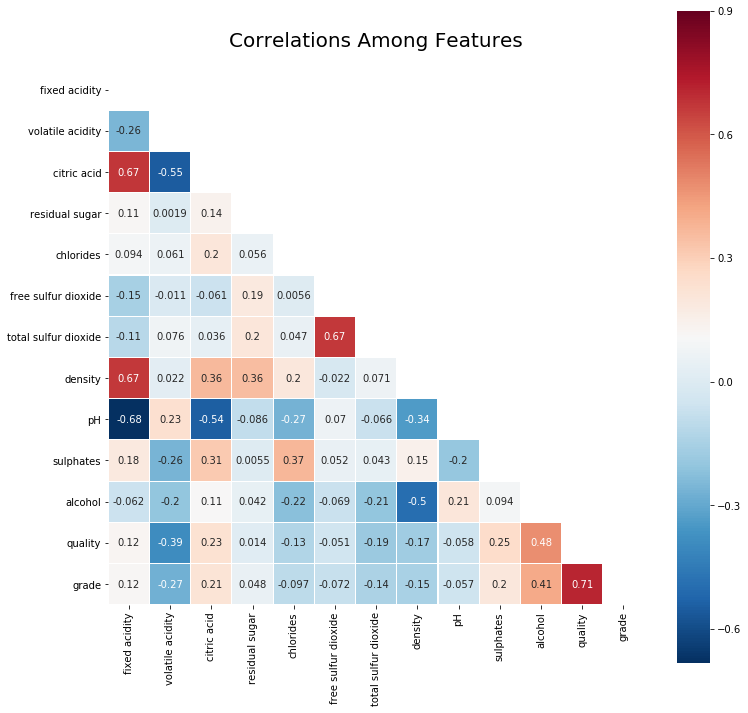

In [8]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (12,12))
sns.heatmap(df.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20)
plt.show()

In [14]:
good = df[df.grade == 1]
notgood = df[df.grade == 0]

In [15]:
drop_items = ['quality','grade']
g1 = pd.DataFrame(good.drop(drop_items, axis=1).mean(), columns=['Good']).T
g2 = pd.DataFrame(notgood.drop(drop_items, axis=1).mean(), columns=['Not Good']).T
total = pd.DataFrame(df.drop(drop_items, axis=1).mean(), columns=['Total Average']).T
data = g1.append([g2, total])

In [16]:
temp1 = data.values.reshape((3, 11))
standard = data.loc['Total Average'].values.reshape((1, 11))
temp = 100* temp1 / standard
data_percentage = pd.DataFrame(temp, columns = data.columns.values.tolist())

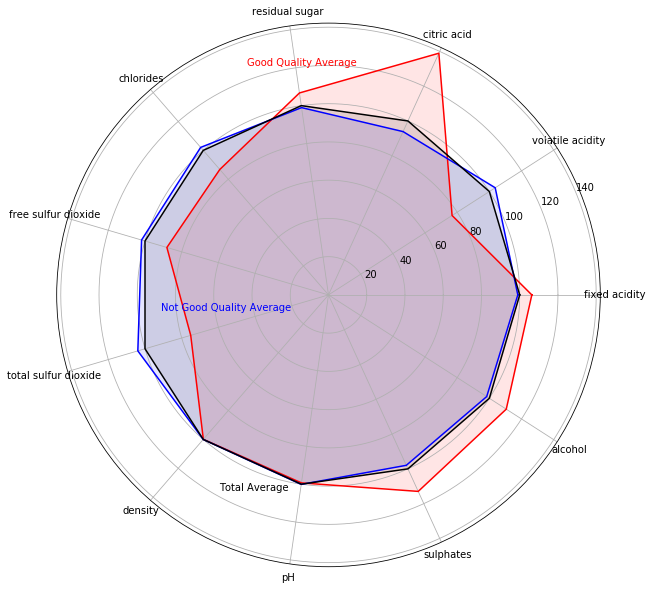

In [17]:
from math import pi
Attributes =list(data_percentage)
AttNo = len(Attributes)

values = data_percentage.iloc[0].tolist() #
values += values [:1]

angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles += angles [:1]

values2 = data_percentage.iloc[1].tolist() # 
values2 += values2 [:1]

angles2 = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles2 += angles2 [:1]

values3 = data_percentage.iloc[2].tolist() # 
values3 += values3 [:1]

angles3 = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles3 += angles3 [:1]

plt.figure(figsize=(10,10))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1],Attributes)

# Good 
ax.plot(angles, values, color = 'r')
ax.fill(angles, values, 'red', alpha=0.1)

# Not Good
ax.plot(angles2, values2, color = 'b')
ax.fill(angles2, values2, 'blue', alpha=0.1)

# Total Average
ax.plot(angles3, values3, color = 'black')
ax.fill(angles3, values3, 'black', alpha=0.1)

plt.figtext(0.4,0.82,'Good Quality Average',color='red')
plt.figtext(0.28,0.48,'Not Good Quality Average',color='blue')
plt.figtext(0.36,0.23,'Total Average',color='black')
plt.show()

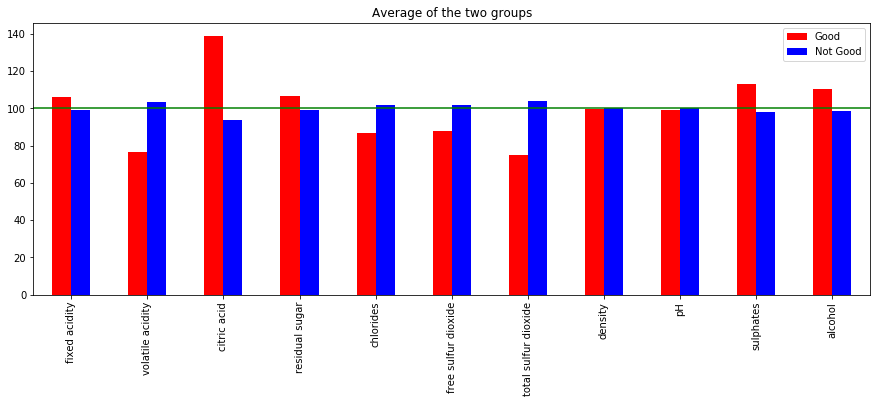

In [18]:
data_percentage[:2].T.plot(kind='bar',figsize=(15,5), color=['red','blue'])
plt.title('Average of the two groups')
plt.legend(('Good','Not Good'))
x = np.linspace(-10,100,10)
y = 100*np.ones(10)
plt.plot(x,y,'green')
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
df_train_features = df.drop(['quality','grade'], axis =1)
n = 11

x_train, x_test, y_train, y_test = train_test_split(df_train_features, df['grade'], test_size=0.1, random_state=7)

x_train_mat = x_train.values.reshape((len(x_train), n))
x_test_mat = x_test.values.reshape((len(x_test), n))

In [22]:
print('Start Predicting...')
rf = RandomForestClassifier()
rf.fit(x_train_mat,y_train)
rf_pred = rf.predict(x_test_mat)

Start Predicting...


In [23]:
print('...Complete')

...Complete


In [24]:
print('Random Forest:', accuracy_score(y_test, rf_pred)*100,'%')

Random Forest: 90.0 %


In [25]:
k = [10,20,30,40,100]
for i in k:
    rf_tune = RandomForestClassifier(n_estimators=50, random_state=i)
    rf_tune.fit(x_train_mat,y_train)
    y_pred = rf_tune.predict(x_test_mat)
    print(accuracy_score(y_test, y_pred)*100,'%')

93.125 %
92.5 %
91.875 %
90.625 %
91.25 %


In [28]:
x_train_check = df_train_features.values.reshape((len(df_train_features), n))
x_test_check = df['grade'].values.reshape((len(df['grade']), 1))

k = [10,20,30,40,50,45]
for i in k:
    rf_tune = RandomForestClassifier(n_estimators=50, random_state=i)
    rf_tune.fit(x_train_mat,y_train)
    yy_pred = rf_tune.predict(x_train_check)
    print(accuracy_score(x_test_check, yy_pred)*100,'%')

99.24953095684803 %
99.24953095684803 %
99.1869918699187 %
98.99937460913071 %
98.99937460913071 %
99.12445278298937 %


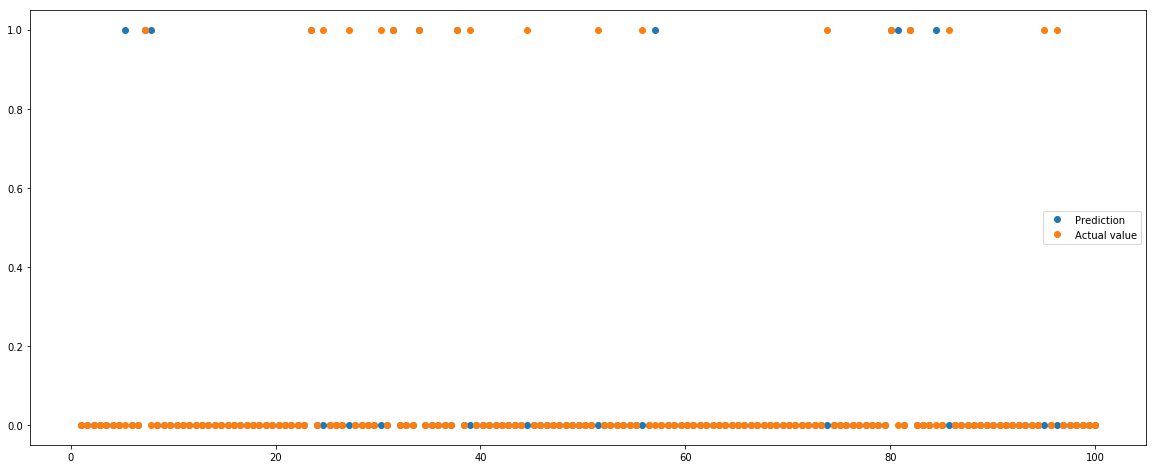

In [29]:
plt.figure(figsize = (20,8))
domain = np.linspace(1,100,len(y_pred)) 
plt.plot(domain, rf_pred,'o')
plt.plot(domain, y_test,'o')
plt.legend(('Prediction','Actual value'))
plt.show()